In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import imread, gaussian_filter
import csv
import os

def lineout(data, start, stop):
    length=np.sqrt((stop[0]-start[0])**2+(stop[1]-start[1])**2)
    xs, ys=np.linspace(start[0], stop[0], length), np.linspace(start[1], stop[1], length)
    lineout = data[xs.astype(np.int), ys.astype(np.int)]
    return lineout

def band_pass(data, low_sigma, hi_sigma):
    data=np.sum(data,2)
    low_pass=gaussian_filter(data, low_sigma)
    norm=data/low_pass.astype(float)
    hi_pass=gaussian_filter(norm, hi_sigma)
    return hi_pass

In [17]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


In [18]:
plas = imread('s0611_15 end on 532nm interferometry t240ns.JPG')
plas_rough=np.sum(plas,2)
plas = band_pass(plas, low_sigma=50,hi_sigma=5)
vac = imread('s0611_15 end on 532nm interferometry bk.JPG')
vac_rough=np.sum(vac,2)
vac = band_pass(vac, low_sigma=50,hi_sigma=5)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


In [19]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
filename=shot+ ' pin positions'
f=[]
x=[]
y=[]
with open(filename+'.txt', 'r') as fn:
    reader = csv.reader(fn, delimiter=',')
    next(reader)
    for row in reader:
        f.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        
xm, xc=np.polyfit(f,x, 1)
ym, yc=np.polyfit(f, y, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)
circles=[]
for i in range(1,15):
    circles.append(plt.Circle((x(i),y(i)),20,color='green',fill=False))

<IPython.core.display.Javascript object>


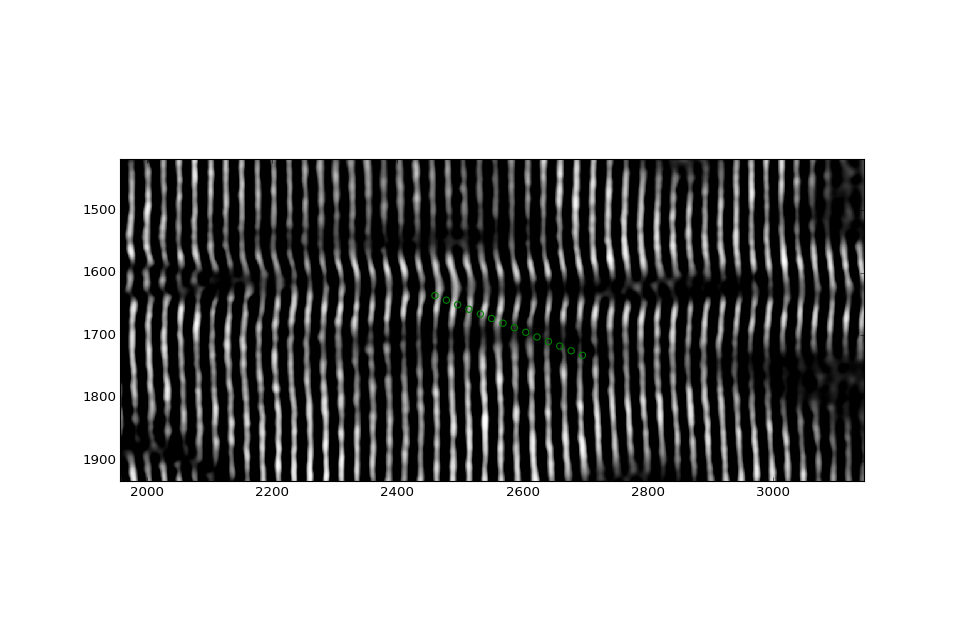

In [7]:
fig, ax=plt.subplots(figsize=(12,8))
for c in circles:
    ax.add_artist(c)
im=ax.imshow(plas-vac, cmap='Greys_r', interpolation='none', clim=[0,1])


(1780, 2881)


<IPython.core.display.Javascript object>


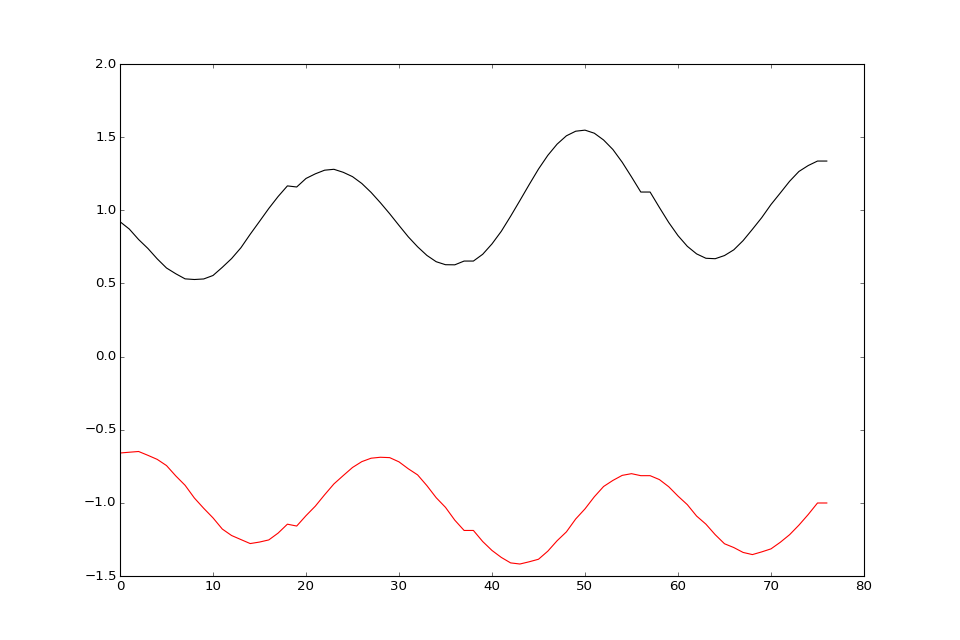

In [11]:
f=13
start_h=(y(14),x(14))
#start_h=(2106,4022)
stop=(y(f),x(f))

print(stop)
lov=lineout(vac, start_h, stop)
lop=lineout(plas, start_h, stop)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lov, color='black')
ax.plot(-lop, color='red')

In [80]:
One_Fringe=4.2e17
Fringe_vac=1
Fringe_plas=0
(Fringe_plas-Fringe_vac)*One_Fringe+3.15e17

-1.05e+17

In [25]:
y0=1628
for i in range(1,15):
    print((y(i)-1628)/173.0)

-1.1618497109826589
-0.9884393063583815
-0.8208092485549133
-0.653179190751445
-0.4797687861271676
-0.31213872832369943
-0.13872832369942195
0.028901734104046242
0.19653179190751446
0.3699421965317919
0.5375722543352601
0.7052023121387283
0.8786127167630058
1.046242774566474


In [24]:
y(15)

1838

# Old Code

In [5]:
#s1006_15 TS C upstream
scale=int(4752/2352.0) #in this shot the pin positions were taken low res....
f2=(1035,1002)
f4=(1062,1065)
f7=(1107,1182)
f10=(1155,1284)
f12=(1182,1359)

dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: scale*int(f*dy/10.0+y0)
x=lambda f: scale*int(f*dx/10.0+x0)

In [66]:
#s1008_15 TS Al outflow
f2=(1612,1716)
f4=(1656,1840)
f7=(1756,2068)
f10=(1852,2304)
f12=(1904,2428)
dy=f12[0]-f2[0]
dx=f12[1]-f2[1]
y0=f2[0]-2*dy/10.0
x0=f2[1]-2*dx/10.0
y=lambda f: int(f*dy/10.0+y0)
x=lambda f: int(f*dx/10.0+x0)

(1427, 2011)


NameError: name 'peak_count' is not defined

1.05e+18

In [161]:
#Probab;y the best so far.
def peak_count(data):
    m=data.mean()
    upper=m*1.1
    lower=m*0.9
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

In [134]:
start_h=(2095,638)#(y(1),x(1))
One_Fringe=4.2e17
neLs=[]

for f in range(14):
    f=f+1
    stop=(y(f),x(f))
    lov=lineout(vac, start_h, stop)
    lop=lineout(plas, start_h, stop)
    peaks_v, locs_v=peak_count(lov)
    peaks_p, locs_p=peak_count(lop)
    FS=(peaks_p-peaks_v)
    neL=FS*One_Fringe
    neLs.append(neL/1e17)
    print(FS, neL)

2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
2.0 8.4e+17
1.0 4.2e+17
1.0 4.2e+17
1.5 6.3e+17
2.0 8.4e+17
3.5 1.47e+18
3.0 1.26e+18
2.5 1.05e+18
2.0 8.4e+17
1.0 4.2e+17


In [159]:
def moving_std(data, window=20):
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(np.std(data[lower:upper]))
    return std

def peak_count(data, window=50):
    m=data.mean()
    std=moving_std(data, window)
    low_peak=0
    hi_peak=0
    in_peak=False
    locs=[]
    for din, d in enumerate(data):
        upper=m+0.1*std[din]
        lower=m-0.1*std[din]
        if d>upper and in_peak is False:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d<upper and d>lower and in_peak is True:
            in_peak=False
        if d<lower and in_peak is False:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


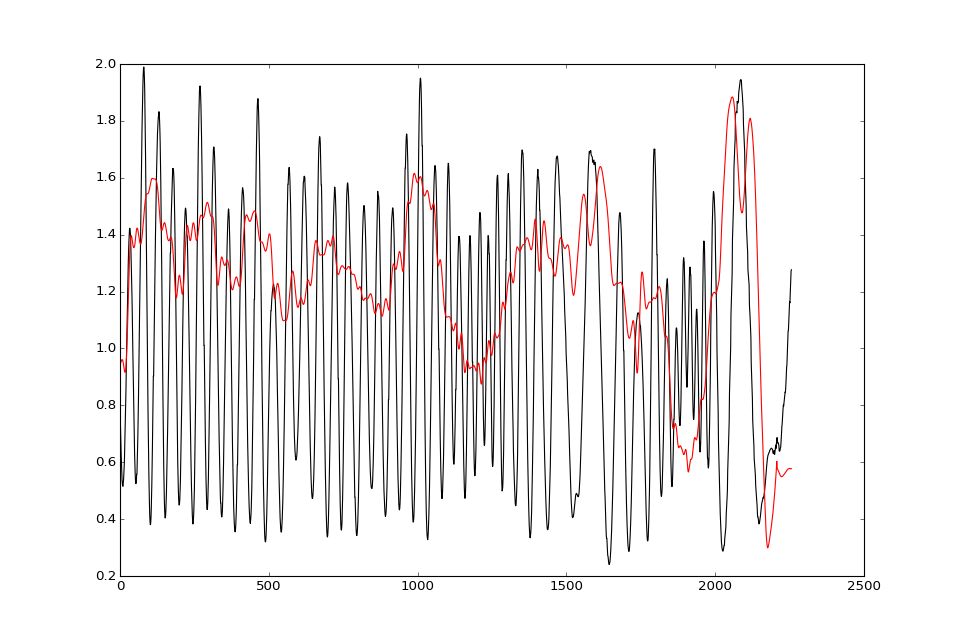

In [149]:
mst=moving_std(lop, window=50)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(lop, color='black')
ax.plot(np.array(mst)*3, color='red')


In [177]:
def local_max(data, window=50):
    lmax=[]
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(data[lower:upper].max())
    return std

def local_min(data, window=50):
    lmax=[]
    std=[]
    for din, d in enumerate(data):
        lower=din-window
        upper=din+window
        if lower<0:
            lower=0
        if upper>data.size:
            upper=-1
        std.append(data[lower:upper].min())
    return std

def peak_count(data, window=50):
    lmin=local_min(data,window)
    lmax=local_max(data,window)
    low_peak=0
    hi_peak=0
    locs=[]
    for din, d in enumerate(data):
        if d==lmax[din]:
            hi_peak=hi_peak+1
            locs.append(din)
            in_peak=True
        if d==lmin[din]:
            low_peak=low_peak+1
            locs.append(din)
            in_peak=True
    return (low_peak+hi_peak+1.0)/2.0, locs

In [178]:
peak_count(lop, 50)

(10.0,
 [10,
  81,
  198,
  273,
  438,
  463,
  565,
  635,
  659,
  754,
  866,
  891,
  917,
  1011,
  1076,
  1139,
  1208,
  1229,
  1328])